In [ ]:
import pandas as pd
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


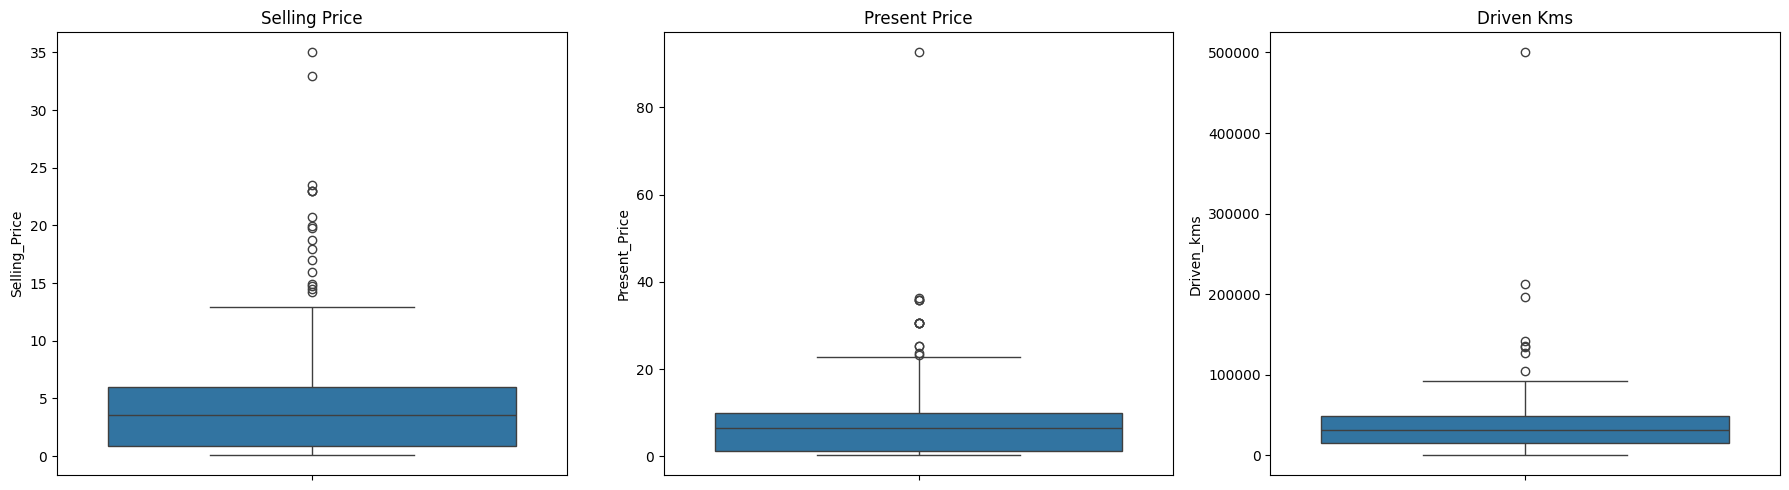

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df['Selling_Price'], ax=axes[0])
axes[0].set_title('Selling Price')

sns.boxplot(y=df['Present_Price'], ax=axes[1])
axes[1].set_title('Present Price')

sns.boxplot(y=df['Driven_kms'], ax=axes[2])
axes[2].set_title('Driven Kms')

plt.tight_layout()
plt.show()



In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to check for outliers
numeric_columns = ['Selling_Price', 'Present_Price', 'Driven_kms']

# Apply the function
df_clean = remove_outliers_iqr(df, numeric_columns)


In [ ]:
df_clean.shape

(276, 9)

In [ ]:
df_clean.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,276.000000,276.000000,276.000000,276.000000,276.000000
mean,2013.750000,3.754928,6.011848,32120.913043,0.036232
std,2.681757,3.067865,4.798365,20722.825248,0.187206
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.750000,0.990000,15000.000000,0.000000
50%,2014.000000,3.300000,5.835000,31213.500000,0.000000
75%,2016.000000,5.675000,9.400000,45128.500000,0.000000
max,2018.000000,12.900000,20.450000,92233.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df_clean = pd.get_dummies(df, drop_first=True)
df_clean.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
x = df_clean.drop('Selling_Price', axis=1)
y = df_clean['Selling_Price']
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.5742622326372286

In [ ]:
print(x.columns.tolist())


['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100', 'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street', 'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Avenger 220 dtsi', 'Car_Name_Bajaj Avenger Street 220', 'Car_Name_Bajaj Discover 100', 'Car_Name_Bajaj Discover 125', 'Car_Name_Bajaj Dominar 400', 'Car_Name_Bajaj Pulsar  NS 200', 'Car_Name_Bajaj Pulsar 135 LS', 'Car_Name_Bajaj Pulsar 150', 'Car_Name_Bajaj Pulsar 220 F', 'Car_Name_Bajaj Pulsar NS 200', 'Car_Name_Bajaj Pulsar RS200', 'Car_Name_Hero  CBZ Xtreme', 'Car_Name_Hero  Ignitor Disc', 'Car_Name_Hero Extreme', 'Car_Name_Hero Glamour', 'Car_Name_Hero Honda CBZ extreme', 'Car_Name_Hero Honda Passion Pro', 'Car_Name_Hero Hunk', 'Car_Name_Hero Passion Pro', 'Car_Name_Hero Passion X pro', 'Car_Name_Hero Splender Plus', 'Car_Name_Hero Splender iSmart', 'Car_Name_Hero Super Splendor', 'Car_Name_Honda Activa 125', 'Car_Name_Honda Activa 4G', 'Car_Name_Honda C

In [ ]:
import numpy as np

# Initialize all to 0
input_data = [0] * len(x.columns)

# Fill numerical values
input_data[x.columns.get_loc('Year')] = 2016
input_data[x.columns.get_loc('Present_Price')] = 8.5
input_data[x.columns.get_loc('Driven_kms')] = 45000
input_data[x.columns.get_loc('Owner')] = 0

# Set car name (only 1 should be 1)
input_data[x.columns.get_loc('Car_Name_swift')] = 1

# Set fuel type
input_data[x.columns.get_loc('Fuel_Type_Petrol')] = 1  # Petrol
# if Diesel: set 'Fuel_Type_Diesel' = 1 instead

# Set selling type
input_data[x.columns.get_loc('Selling_type_Individual')] = 1

# Set transmission
input_data[x.columns.get_loc('Transmission_Manual')] = 1

# Convert to 2D array and predict
sample = np.array(input_data).reshape(1, -1)
predicted_price = model.predict(sample)

print(f"Predicted Selling Price: ₹{predicted_price[0]:,.2f}")


Predicted Selling Price: ₹2.09


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


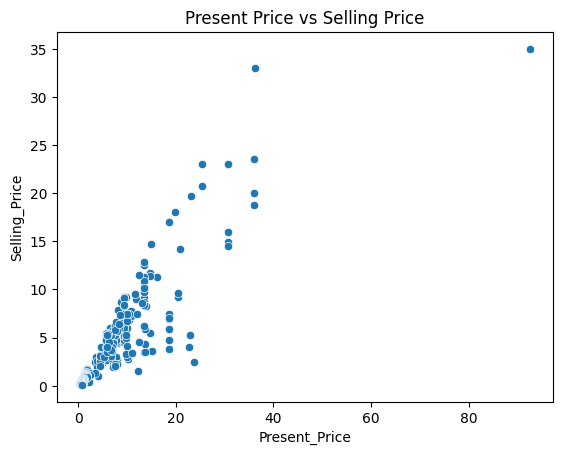

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'])
plt.title('Present Price vs Selling Price')
plt.show()
